<a href="https://colab.research.google.com/github/KILjungjoon/Project_Asian_Parliament/blob/main/%ED%9A%8C%EC%9D%98_%EB%82%A0%EC%A7%9C_%EC%B6%94%EC%B6%9C%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 홍콩 의회 회의 날짜만 추출하기

In [1]:
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import requests
from bs4 import BeautifulSoup as bs

# url 주소
url="https://www.legco.gov.hk/yr16-17/english/counmtg/question/ques1617.htm"

# avoid SSLError: max retries
from urllib3.exceptions import InsecureRequestWarning
from urllib3 import disable_warnings
disable_warnings(InsecureRequestWarning)

page = requests.get(url, verify=False)  # SSLError를 피하기 위해 verify=False를 지정
soup = bs(page.text, "html.parser")     # Soup 객체 생성

# Soup 객체를 이용하여 문서를 출력
print(soup.prettify())

ï»¿
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="no-cache" http-equiv="cache-control"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <meta content="0" http-equiv="expires"/>
  <meta content="" name="keywords"/>
  <meta content="" name="description"/>
  <title>
   Legislative Council of the Hong Kong Special Administrative Region - Council Meetings (Questions)
  </title>
  <!-- NOT IMPORT START -->
  <link href="/scripts/style.css" rel="stylesheet" title="style_s" type="text/css"/>
  <link href="/scripts/style_medium.css" rel="alternate stylesheet" title="style_m" type="text/css"/>
  <link href="/scripts/style_large.css" rel="alternate stylesheet" title="style_l" type="text/css"/>
  <link href="/scripts/common.css" rel="stylesheet" type="text/c

* 날짜 텍스트가 포함된 태그

>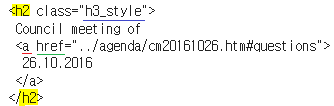
* 아래 2가지 방법으로 텍스트를 불러올 수 있다.

In [4]:
# select('태그이름')으로 불러오기 
soup.select('h2')

[<h2 class="h3_style">Council meeting of <a href="../agenda/cm20161019.htm#questions">19.10.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161026.htm#questions">26.10.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161102.htm#questions">02.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161109.htm#questions">09.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161116.htm#questions">16.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161123.htm#questions">23.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161130.htm#questions">30.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161207.htm#questions">07.12.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161214.htm#questions">14.12.2016</a></h2>,
 <h2 class="h3_style">Council meeting

In [5]:
# select('.클래스이름') : 클래스 이름으로 불러오기
soup.select('.h3_style')

[<h2 class="h3_style">Council meeting of <a href="../agenda/cm20161019.htm#questions">19.10.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161026.htm#questions">26.10.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161102.htm#questions">02.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161109.htm#questions">09.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161116.htm#questions">16.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161123.htm#questions">23.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161130.htm#questions">30.11.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161207.htm#questions">07.12.2016</a></h2>,
 <h2 class="h3_style">Council meeting of <a href="../agenda/cm20161214.htm#questions">14.12.2016</a></h2>,
 <h2 class="h3_style">Council meeting

In [6]:
for t in soup.select('h2') :
  print((t.text).split()[3])

19.10.2016
26.10.2016
02.11.2016
09.11.2016
16.11.2016
23.11.2016
30.11.2016
07.12.2016
14.12.2016
11.01.2017
08.02.2017
15.02.2017
22.02.2017
01.03.2017
22.03.2017
29.03.2017
12.04.2017
26.04.2017
10.05.2017
17.05.2017
24.05.2017
31.05.2017
07.06.2017
14.06.2017
21.06.2017
28.06.2017
05.07.2017
12.07.2017
